# Model Selection and Hyperparameter Tunning Exercise 



In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Part 1. Load the Dataset 

For this exercise, we will use the image dataset `Scenes`, which has 4,436 images of different scenes, categorized into 10 classes. The classes include: airport terminal, amusement park, bedroom, bridge, castle, conference room, golf course, highway, mountain, and playground.

Follow the instructions in Lectures for loading a custom dataset, and load the `Scenes` dataset from the `data` directory. The dataset contains one directory with all 4,436 images, and a `labels.csv` file with the class labels for the images. For the resolution of the loaded images, select 128x128 pixels. First load all images, and afterwards split them into training and testing sets.

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras.utils import load_img, img_to_array
import os
from os import listdir
import csv
import natsort

In [3]:
print('Tensorflow version: ', tensorflow.__version__)

Tensorflow version:  2.14.0


In [ ]:
# uncompress the data to a dictionary
!unzip -uq '/content/drive/MyDrive/Colab Notebooks/cs504/assignment5/data/Scenes_dataset.zip' -d '/content/drive/MyDrive/Colab Notebooks/cs504/assignment5/data/Scenes_dataset/'

In [5]:
# load imags

img_size = 128

def load_imgs(path):
  #list of all the images in the foler
  img_list = listdir(path)
  #to make sure the img_list is sorted ascending
  img_list = natsort.natsorted(img_list)

  # the number of the images
  img_number = len(img_list)

  # images
  images = np.zeros((img_number, img_size, img_size, 3))
  for i in range(img_number):
    temp_imgs = load_img(path + img_list[i], target_size = (img_size, img_size, 3))
    img = img_to_array(temp_imgs)
    images[i] = img/255
  return images

In [6]:
# load images
imgs_dir = '/content/drive/MyDrive/Colab Notebooks/cs504/assignment5/data/Scenes_dataset/Scenes_dataset/images/'
images = load_imgs(imgs_dir)

In [7]:
# load the labels

labels_dir = '/content/drive/MyDrive/Colab Notebooks/cs504/assignment5/data/Scenes_dataset/Scenes_dataset/'
labels = np.genfromtxt(labels_dir + 'labels.csv', delimiter = ',', dtype = np.int32)
labels

array([0, 0, 0, ..., 9, 9, 9], dtype=int32)

Split the dataset into a training and 20% testing dataset. Display the shape of the train and test arrays of the images and labels.

In [ ]:

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels  = train_test_split(images, labels, test_size = 0.2, stratify = labels)


In [9]:
print(f'Train data shape: {train_data.shape} \t train lable shape: {train_labels.shape}')
print(f'Test data shape: {test_data.shape} \t test label shape: {test_labels.shape}')

Train data shape: (3548, 128, 128, 3) 	 train lable shape: (3548,)
Test data shape: (888, 128, 128, 3) 	 test label shape: (888,)


Display the maximum and minimum values of the images. If needed, resize the images so that their values are in the [0,1] range.

In [ ]:

print('train_data Maximun:{0:5.2f}\ttrain_data Minimum:{1:5.2f}'.format(np.max(train_data), np.min(train_data)))
print('test_data Maximun:{0:5.2f}\t \ttest_data Minimum:{1:5.2f}'.format(np.max(test_data), np.min(test_data)))

train_data Maximun: 1.00	train_data Minimum: 0.00
test_data Maximun: 1.00	 	test_data Minimum: 0.00


Display several images in the training dataset **and their labels**. Check to ensure that the labels match the images.

In [10]:
label_names = ['airport_terminal', 'amusement_park', 'bedroom', 'bridge', 'castle', 'conference_room',
               'golf_course', 'highway', 'mountain', 'playground']

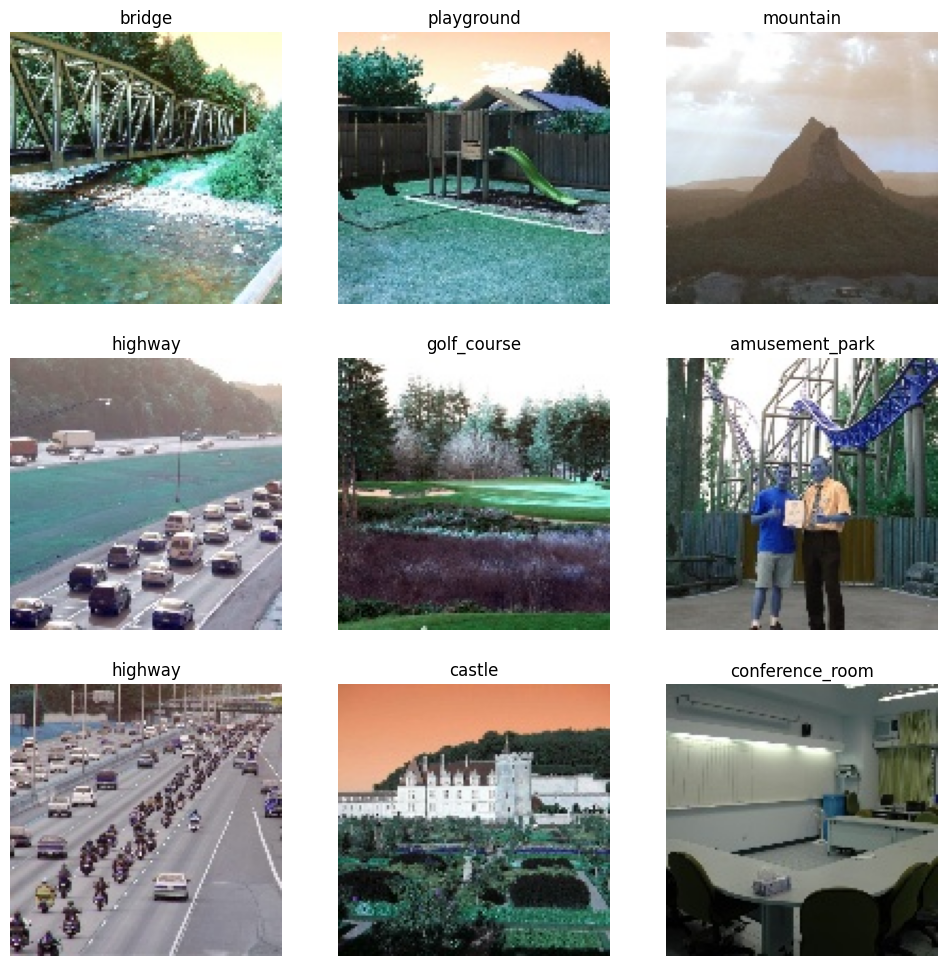

In [11]:
import random

plt.figure(figsize = (12,12))

for i in range(9):
  plt.subplot(3, 3, i+1)
  index = random.choice(range(len(images)))
  plt.imshow(images[index])
  plt.title(label_names[labels[index]])
  plt.axis('off')

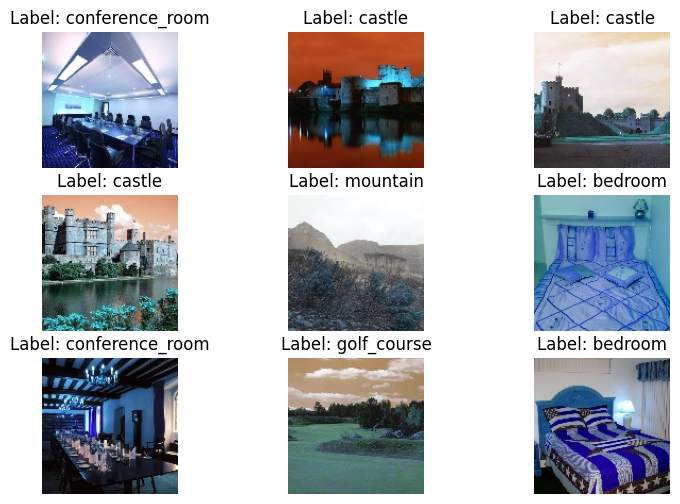

In [ ]:
label_names = ['airport_terminal', 'amusement_park', 'bedroom', 'bridge', 'castle', 'conference_room',
               'golf_course', 'highway', 'mountain', 'playground']



## Part 2. Model Definition and Training 

Create a CNN model called `model_1` which has similar architecture to the `cifar_cnn` network from the lecture on CNNs, and has 3 blocks of Conv2D-Conv2D-MaxPooling layers with 64, 128, and 256 filters, a Flatten layer, two Dense layers with 128 and 64 neurons, and an output Dense layer.

In [10]:
from keras.layers import Input
from keras.layers import Dense
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.models import Model

In [ ]:

def Network():
  inputs = Input( shape = (128,128,3))

  conv1a = Conv2D(filters = 64, kernel_size = 3, padding = 'same')(inputs)
  conv1b = Conv2D(filters = 64, kernel_size = 3, padding = 'same')(conv1a)
  pool1 = MaxPooling2D()(conv1b)

  conv2a = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(pool1)
  conv2b = Conv2D(filters = 128, kernel_size = 3, padding = 'same')(conv2a)
  pool2 = MaxPooling2D()(conv2b)

  conv3a = Conv2D(filters = 256, kernel_size = 3, padding = 'same')(pool2)
  conv3b = Conv2D(filters = 256, kernel_size = 3, padding = 'same')(conv3a)
  pool3 = MaxPooling2D()(conv3b)

  flat = Flatten()(pool3)

  dense1 = Dense(128, activation = 'relu')(flat)
  dense2 = Dense(64, activation = 'relu')(dense1)
  outputs = Dense(10, activation = 'softmax')(dense2)

  model = Model(inputs, outputs)

  return model

Display a summary of the model. State how many parameters the model has.

In [ ]:


model_1 = Network()
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                             

There are in total 9543050 parameters in the model

Compile the model using Adam optimizer with a learning rate of 1e-4, and define the suitable loss function for this model. Use accuracy as a metric.

In [ ]:

from keras.optimizers import Adam
LEARNING_RATE = 1e-4

model_1.compile(optimizer = Adam(learning_rate = LEARNING_RATE), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

Train the model by using a batch size of 64 images for updating the model parameters, and assign 20% of the training data as a validation set. Use Early Stopping callback with a patience of 10 epochs. Set the number of epochs to 100.

The model training should take between 2 and 5 minutes with a GPU.

In [ ]:

from keras.callbacks import EarlyStopping

callbacks = [EarlyStopping(monitor = 'val_loss', patience = 10)]

history1 = model_1.fit(train_data, train_labels,
            batch_size = 64, epochs = 100,
            callbacks = callbacks,
            validation_split = 0.2)


Epoch 1/100
45/45 [==============================] - 32s 268ms/step - loss: 1.8441 - accuracy: 0.3545 - val_loss: 1.5247 - val_accuracy: 0.4592
Epoch 2/100
45/45 [==============================] - 9s 197ms/step - loss: 1.4225 - accuracy: 0.5000 - val_loss: 1.3159 - val_accuracy: 0.5648
Epoch 3/100
45/45 [==============================] - 8s 184ms/step - loss: 1.2572 - accuracy: 0.5754 - val_loss: 1.3512 - val_accuracy: 0.5239
Epoch 4/100
45/45 [==============================] - 9s 191ms/step - loss: 1.1696 - accuracy: 0.5923 - val_loss: 1.2587 - val_accuracy: 0.5746
Epoch 5/100
45/45 [==============================] - 8s 187ms/step - loss: 1.0449 - accuracy: 0.6300 - val_loss: 1.3163 - val_accuracy: 0.5972
Epoch 6/100
45/45 [==============================] - 9s 192ms/step - loss: 0.9309 - accuracy: 0.6822 - val_loss: 1.2868 - val_accuracy: 0.6000
Epoch 7/100
45/45 [==============================] - 9s 193ms/step - loss: 0.8051 - accuracy: 0.7283 - val_loss: 1.2394 - val_accuracy: 0.621

Plot the learning curves of the model.

In [ ]:

def plot_accuracy_loss(history):
    # plot the accuracy and loss
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    epochsn = np.arange(1, len(train_loss)+1,1)
    plt.figure(figsize=(12, 4))

    plt.subplot(1,2,1)
    plt.plot(epochsn, acc, 'b', label='Training Accuracy')
    plt.plot(epochsn, val_acc, 'r', label='Validation Accuracy')
    plt.grid(color='gray', linestyle='--')
    plt.legend()
    plt.title('ACCURACY')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')

    plt.subplot(1,2,2)
    plt.plot(epochsn,train_loss, 'b', label='Training Loss')
    plt.plot(epochsn,val_loss, 'r', label='Validation Loss')
    plt.grid(color='gray', linestyle='--')
    plt.legend()
    plt.title('LOSS')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()



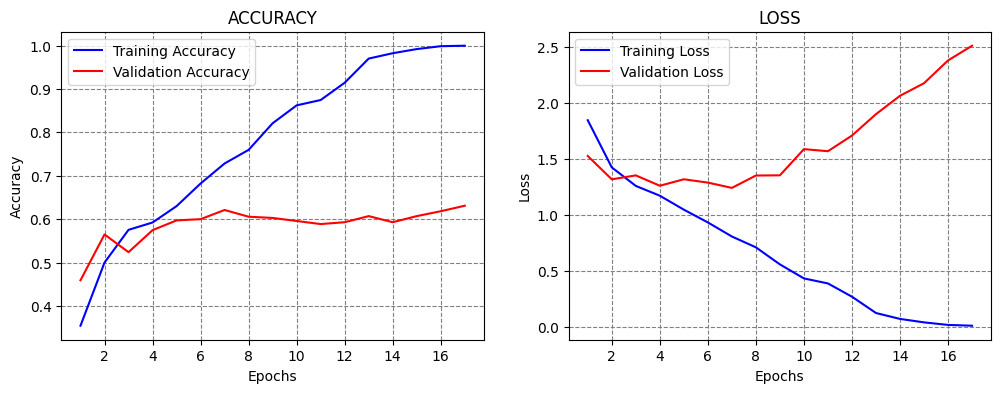

In [18]:
plot_accuracy_loss(history1)

Calculate the accuracy of the model on the test dataset. Discuss the performance of the model in 1-2 sentences.

In [ ]:

val_accuracy_1 = model_1.evaluate(test_data, test_labels)
print(f'Test accuracy: {val_accuracy_1[1]:5.4f}')

28/28 [==============================] - 3s 66ms/step - loss: 2.7974 - accuracy: 0.5766
Test accuracy: 0.5766


The model shows overfitting on training data. The traing accuracy reached 0.9905, but test accuracy is just 0.5766.

## Part 3. Transfer Learning 

Create a model named `model_2` that is similar to the CNN models for transfer learning in Lectures, and uses a VGG-16 as a base model, followed by a Global Average Pooling layer, two Dense layers with 128 and 64 neurons, Dropout layers, and an output Dense layer.

In [13]:
from tensorflow.keras.applications import vgg16
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout

In [ ]:

def NetWork_vgg16():
  base_model = vgg16.VGG16(weights = 'imagenet', include_top = False, input_shape = (img_size, img_size, 3))

  x = base_model.output
  x = GlobalAveragePooling2D()(x)

  x = Dense(128, activation = 'relu')(x)
  x = Dense(64, activation = 'relu')(x)
  x = Dropout(0.2)(x)
  outputs = Dense(10, activation = 'softmax')(x)

  model = Model(inputs = base_model.input, outputs = outputs)

  return model




In [22]:
model_2 = NetWork_vgg16()

58889256/58889256 [==============================] - 0s 0us/step


Compile the model using Adam optimizer with a learning rate of 1e-4, and train it by using the same settings as for `model_1`.

The model training should take between 4 and 10 minutes with a GPU.

In [ ]:

LEARNING_RATE = 1e-4

model_2.compile(optimizer = Adam(learning_rate = LEARNING_RATE),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])


In [24]:
history2 = model_2.fit(train_data, train_labels,
                       batch_size = 64,epochs = 100,
                       callbacks = callbacks,
                       validation_split = 0.2)


Epoch 1/100
45/45 [==============================] - 26s 372ms/step - loss: 1.7858 - accuracy: 0.3728 - val_loss: 1.1264 - val_accuracy: 0.6183
Epoch 2/100
45/45 [==============================] - 14s 318ms/step - loss: 0.9143 - accuracy: 0.6991 - val_loss: 0.6369 - val_accuracy: 0.7676
Epoch 3/100
45/45 [==============================] - 14s 309ms/step - loss: 0.6896 - accuracy: 0.7812 - val_loss: 0.4520 - val_accuracy: 0.8493
Epoch 4/100
45/45 [==============================] - 13s 300ms/step - loss: 0.4332 - accuracy: 0.8619 - val_loss: 0.7621 - val_accuracy: 0.7549
Epoch 5/100
45/45 [==============================] - 14s 306ms/step - loss: 0.3837 - accuracy: 0.8746 - val_loss: 0.3608 - val_accuracy: 0.8662
Epoch 6/100
45/45 [==============================] - 14s 309ms/step - loss: 0.2904 - accuracy: 0.9105 - val_loss: 0.4933 - val_accuracy: 0.8380
Epoch 7/100
45/45 [==============================] - 14s 304ms/step - loss: 0.2650 - accuracy: 0.9186 - val_loss: 0.4484 - val_accuracy:

Plot the learning curves, evaluate the accuracy on the test dataset, and briefly discuss the performance in comparison to `model_1`.

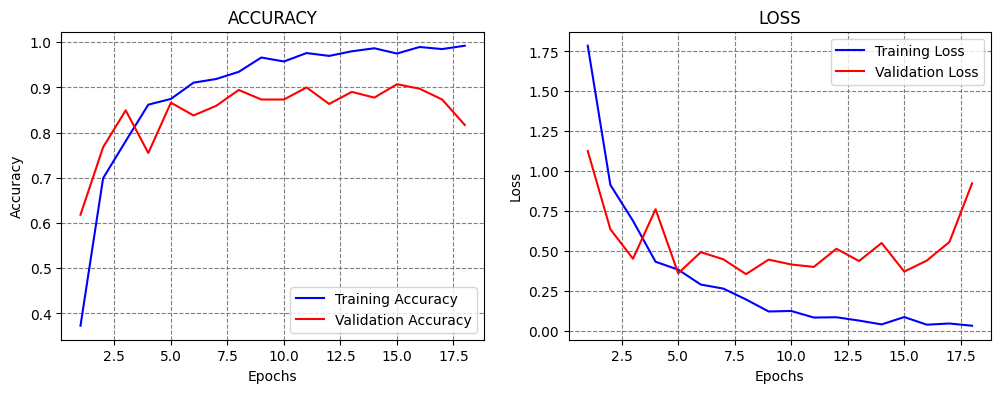

In [ ]:

plot_accuracy_loss(history2)

In [26]:
evals_accuray_2 = model_2.evaluate(test_data, test_labels)
print(f'Test accuracy: {evals_accuray_2[1]:{5}.{4}}')

28/28 [==============================] - 4s 86ms/step - loss: 0.8716 - accuracy: 0.8097
Test accuracy: 0.8097


Model_2 is tranfer learning model based on vgg16 and it uses paramters of vgg16. It only trains the top layer parameters. It has much better performance than model_1

Plot a few images from the test dataset and **display the ground-truth and predicted labels**.

In [27]:
pre_test = model_2.predict(test_data)

28/28 [==============================] - 1s 42ms/step


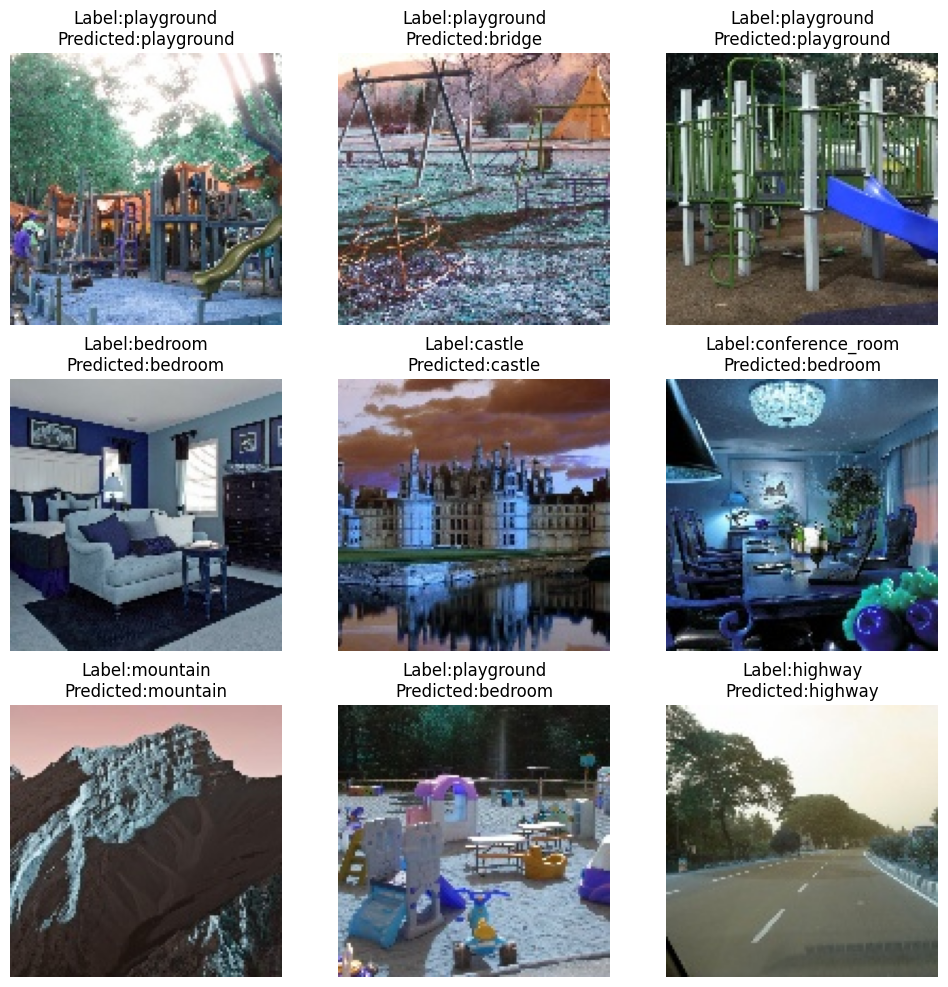

In [28]:
plt.figure(figsize = (12,12))

for i in range(9):
  index = random.choice(range(len(test_data)))
  plt.subplot(3,3,i+1)
  plt.imshow(test_data[index])
  plt.title('Label:{}\nPredicted:{}'.format(label_names[test_labels[index]],
                                            label_names[np.argmax(pre_test[index])]))
  plt.axis('off')


## Part 4. Learning Rate 1e-3 

Create a new instance of a model named `model_3` with the exact same architecture and hyperparameters as `model_2`, and train it with a learning rate of 1e-3. Plot the learning curves, and evaluate the model.

Ensure that every model begins the training from a random initialization, and does not continue from the previous model.

In [ ]:

model_3 = NetWork_vgg16()

In [31]:
LEARNING_RATE = 1e-3

model_3.compile(optimizer = Adam(learning_rate= LEARNING_RATE),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])


In [32]:
history3 = model_3.fit(train_data, train_labels,
                       epochs = 100, batch_size = 64,
                       callbacks = callbacks,
                       validation_split = 0.2)

Epoch 1/100
45/45 [==============================] - 18s 309ms/step - loss: 2.7883 - accuracy: 0.1501 - val_loss: 2.2981 - val_accuracy: 0.1648
Epoch 2/100
45/45 [==============================] - 13s 297ms/step - loss: 2.2788 - accuracy: 0.1762 - val_loss: 2.2662 - val_accuracy: 0.1648
Epoch 3/100
45/45 [==============================] - 13s 297ms/step - loss: 2.1578 - accuracy: 0.2142 - val_loss: 1.9826 - val_accuracy: 0.3113
Epoch 4/100
45/45 [==============================] - 13s 291ms/step - loss: 1.9980 - accuracy: 0.2801 - val_loss: 1.9030 - val_accuracy: 0.3099
Epoch 5/100
45/45 [==============================] - 13s 280ms/step - loss: 1.8033 - accuracy: 0.3252 - val_loss: 1.6028 - val_accuracy: 0.4099
Epoch 6/100
45/45 [==============================] - 13s 289ms/step - loss: 1.6425 - accuracy: 0.3883 - val_loss: 1.5585 - val_accuracy: 0.4282
Epoch 7/100
45/45 [==============================] - 13s 291ms/step - loss: 1.5864 - accuracy: 0.4204 - val_loss: 1.4875 - val_accuracy:

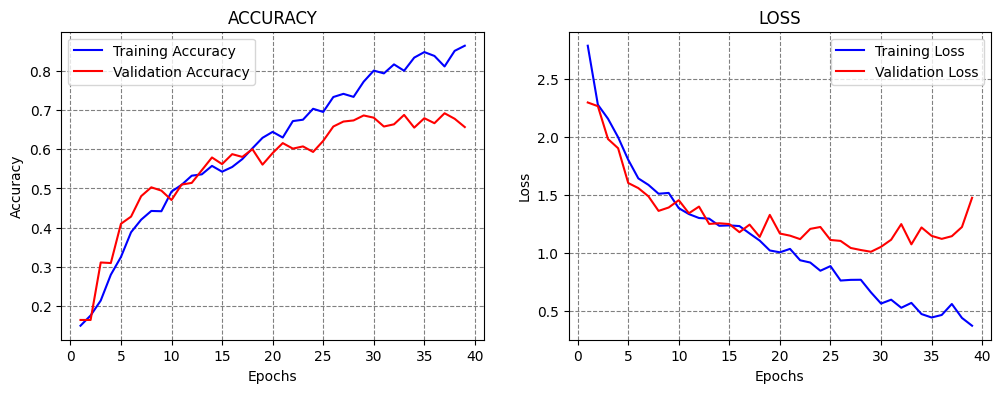

In [33]:
plot_accuracy_loss(history3)

In [34]:
evals_test_3 = model_3.evaluate(test_data, test_labels)
print('Test accuracy: %5.2f' % (evals_test_3[1]))

28/28 [==============================] - 1s 43ms/step - loss: 1.4758 - accuracy: 0.6509
Test accuracy:  0.65


## Part 5. Learning Rate of 1e-5 

Similarly, create a new instance named `model_4` , and train it with a learning rate of 1e-5. Plot the learning curves, and evaluate the model.

In [ ]:

model_4 = NetWork_vgg16()

In [15]:
LEARNING_RATE = 1e-5
model_4.compile(optimizer = Adam(learning_rate = LEARNING_RATE),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])


In [18]:
history4 = model_4.fit(train_data, train_labels,
                        epochs = 100, batch_size = 64,
                        callbacks = callbacks,
                        validation_split = 0.2)

Epoch 1/100
45/45 [==============================] - 42s 422ms/step - loss: 2.0386 - accuracy: 0.2773 - val_loss: 1.5806 - val_accuracy: 0.4803
Epoch 2/100
45/45 [==============================] - 14s 302ms/step - loss: 1.2975 - accuracy: 0.5592 - val_loss: 0.8264 - val_accuracy: 0.7521
Epoch 3/100
45/45 [==============================] - 14s 316ms/step - loss: 0.8209 - accuracy: 0.7347 - val_loss: 0.5913 - val_accuracy: 0.8211
Epoch 4/100
45/45 [==============================] - 14s 316ms/step - loss: 0.5985 - accuracy: 0.7995 - val_loss: 0.4870 - val_accuracy: 0.8535
Epoch 5/100
45/45 [==============================] - 14s 310ms/step - loss: 0.4775 - accuracy: 0.8386 - val_loss: 0.4747 - val_accuracy: 0.8493
Epoch 6/100
45/45 [==============================] - 14s 311ms/step - loss: 0.3946 - accuracy: 0.8746 - val_loss: 0.4315 - val_accuracy: 0.8620
Epoch 7/100
45/45 [==============================] - 14s 303ms/step - loss: 0.3274 - accuracy: 0.8929 - val_loss: 0.4041 - val_accuracy:

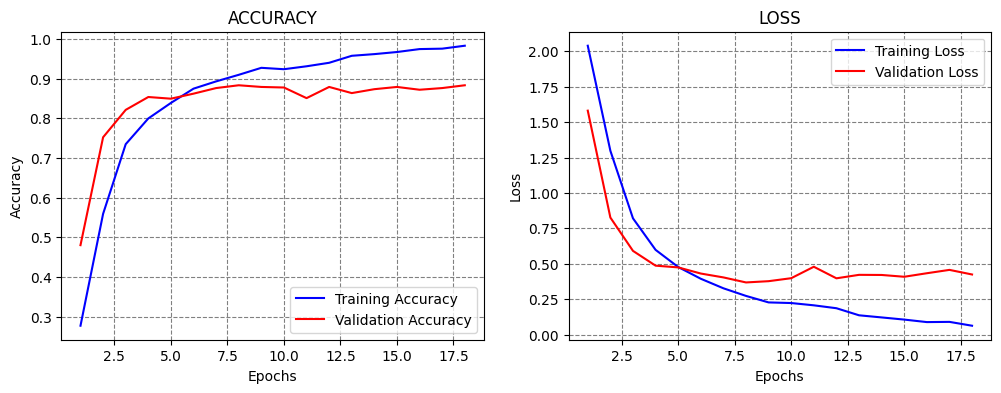

In [21]:
plot_accuracy_loss(history4)

In [23]:
evals_test_4 = model_4.evaluate(test_data, test_labels)
print('Test accuracy: %5.2f' % (evals_test_4[1]))

28/28 [==============================] - 2s 51ms/step - loss: 0.3924 - accuracy: 0.8930
Test accuracy:  0.89


## Part 6. ReduceLROnPlateau

Create a new model named `model_5` that is similar to the previous models, and train it with using ReduceLROnPlateau callback, by reducing the learning rate from 1e-4 to 1e-6. Combine it with an Early Stopping callback to stop the training at the end if the validation loss doesn't decrease. Plot the learning curves, and evaluate the model.

In [15]:
from keras.callbacks import ReduceLROnPlateau

In [ ]:

model_5 = NetWork_vgg16()

In [25]:
LEARNING_RATE = 1e-4

model_5.compile (optimizer = Adam(learning_rate = LEARNING_RATE),
                 loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])


In [28]:
callbacks_2 = [EarlyStopping(monitor = 'val_loss', patience = 10),
             ReduceLROnPlateau(monitor = 'val_loss',
                               patience = 5,
                               factor = 0.1,
                               min_lr = 1e-6)]

historty5 = model_5.fit(train_data, train_labels,
                        batch_size = 64, epochs = 100,
                        validation_split = 0.2,
                        callbacks = callbacks_2)

Epoch 1/100
45/45 [==============================] - 19s 325ms/step - loss: 1.5707 - accuracy: 0.4443 - val_loss: 1.0720 - val_accuracy: 0.6423 - lr: 1.0000e-04
Epoch 2/100
45/45 [==============================] - 14s 314ms/step - loss: 0.7783 - accuracy: 0.7385 - val_loss: 0.5068 - val_accuracy: 0.8451 - lr: 1.0000e-04
Epoch 3/100
45/45 [==============================] - 14s 310ms/step - loss: 0.5370 - accuracy: 0.8249 - val_loss: 0.5026 - val_accuracy: 0.8394 - lr: 1.0000e-04
Epoch 4/100
45/45 [==============================] - 14s 312ms/step - loss: 0.3619 - accuracy: 0.8816 - val_loss: 0.4789 - val_accuracy: 0.8394 - lr: 1.0000e-04
Epoch 5/100
45/45 [==============================] - 14s 308ms/step - loss: 0.2842 - accuracy: 0.9116 - val_loss: 0.5057 - val_accuracy: 0.8479 - lr: 1.0000e-04
Epoch 6/100
45/45 [==============================] - 13s 300ms/step - loss: 0.2347 - accuracy: 0.9214 - val_loss: 0.5677 - val_accuracy: 0.8507 - lr: 1.0000e-04
Epoch 7/100
45/45 [===============

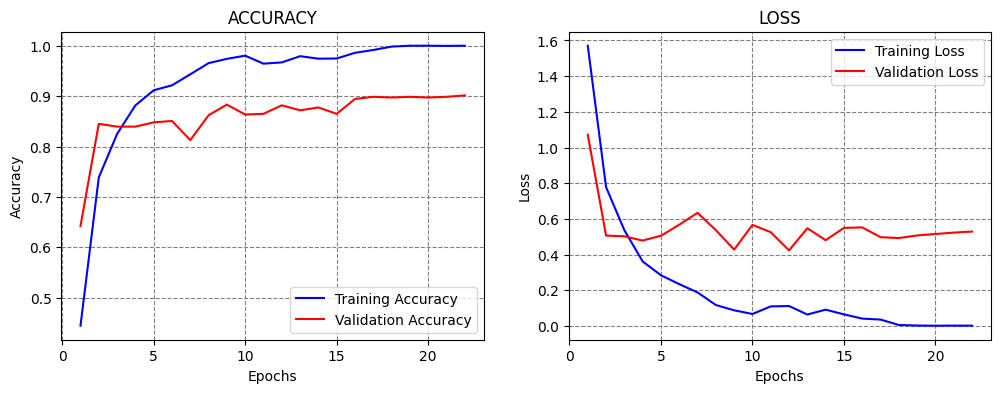

In [30]:
plot_accuracy_loss(historty5)

In [31]:
evals_test_5 = model_5.evaluate(test_data, test_labels)
print('Test accuracy: %5.4f' % (evals_test_5[1]))

28/28 [==============================] - 1s 49ms/step - loss: 0.4123 - accuracy: 0.9167
Test accuracy: 0.9167


## Part 7. Data Augmentation 

Create a new model named `model_6` that is similar to `model_5` but uses data augmentation. Apply the following augmentation operations:
- Width shift 10%
- Height shift 10%
- Horizontal flip
- Zoom range 20%
- Shear range 10%
- Rotation range 10 degrees

In [17]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:

datagen = ImageDataGenerator(width_shift_range = 0.1,
                             height_shift_range = 0.1,
                             horizontal_flip = True,
                             zoom_range = 0.2,
                             shear_range = 0.1,
                             rotation_range = 10)

Use the `train_test_split` function to create a validation dataset that contains 20% of the training dataset. Display the shapes of the train and validation arrays.

In [ ]:

train_data_6, val_data_6, train_label_6, val_label_6 = train_test_split(train_data, train_labels,
                                                                        test_size = 0.2,
                                                                        stratify = train_labels)

In [20]:
print(f'train_data shape: {train_data_6.shape}\ttrain_label shape: {train_label_6.shape}')
print(f'validation_data shape: {val_data_6.shape}\tvalidation_label shape: {( val_label_6.shape)}')

train_data shape: (2838, 128, 128, 3)	train_label shape: (2838,)
validation_data shape: (710, 128, 128, 3)	validation_label shape: (710,)


Train the model using Early Stopping and show the training time. Plot the learning curves and evaluate the model.

In [ ]:


model_6 = NetWork_vgg16()

In [37]:
LEARNING_RATE = 1e-4

model_6.compile(optimizer = Adam(learning_rate = LEARNING_RATE),
                loss = 'sparse_categorical_crossentropy',
                metrics = ['accuracy'])

In [38]:
import datetime

In [39]:
now = datetime.datetime.now
t = now()
history6 = model_6.fit(train_data_6,train_label_6,
                      batch_size = 64, epochs = 100,
                      validation_data = (val_data_6, val_label_6),
                      callbacks = callbacks_2)
print('Training time: ', now() - t)

Epoch 1/100
45/45 [==============================] - 18s 310ms/step - loss: 1.5042 - accuracy: 0.4887 - val_loss: 0.7796 - val_accuracy: 0.7775 - lr: 1.0000e-04
Epoch 2/100
45/45 [==============================] - 14s 307ms/step - loss: 0.7079 - accuracy: 0.7717 - val_loss: 0.5997 - val_accuracy: 0.8014 - lr: 1.0000e-04
Epoch 3/100
45/45 [==============================] - 13s 296ms/step - loss: 0.4694 - accuracy: 0.8471 - val_loss: 0.5604 - val_accuracy: 0.8141 - lr: 1.0000e-04
Epoch 4/100
45/45 [==============================] - 13s 298ms/step - loss: 0.3962 - accuracy: 0.8774 - val_loss: 0.4744 - val_accuracy: 0.8563 - lr: 1.0000e-04
Epoch 5/100
45/45 [==============================] - 13s 294ms/step - loss: 0.3191 - accuracy: 0.8999 - val_loss: 0.5454 - val_accuracy: 0.8338 - lr: 1.0000e-04
Epoch 6/100
45/45 [==============================] - 13s 295ms/step - loss: 0.3065 - accuracy: 0.9084 - val_loss: 0.5055 - val_accuracy: 0.8465 - lr: 1.0000e-04
Epoch 7/100
45/45 [===============

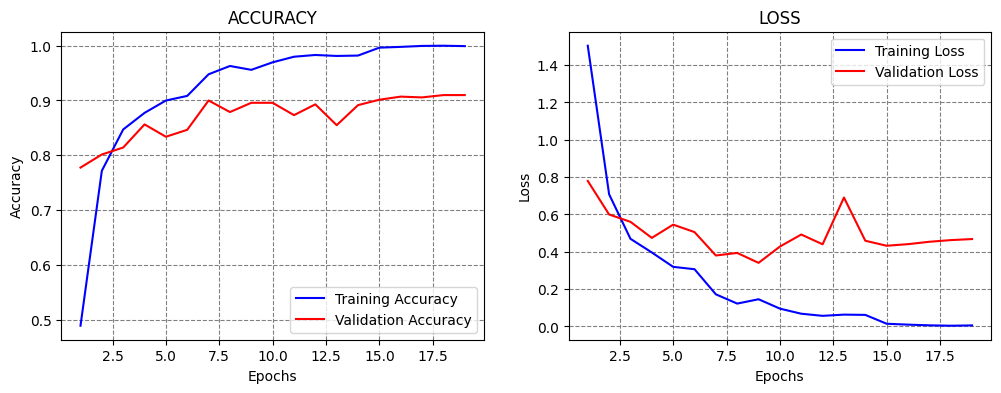

In [40]:
plot_accuracy_loss(history6)

In [41]:
evals_test_6 = model_6.evaluate(test_data, test_labels)
print('Test accuracy: {0:5.4f}'.format(evals_test_6[1]))

28/28 [==============================] - 1s 42ms/step - loss: 0.4143 - accuracy: 0.9088
Test accuracy: 0.9088


Briefly discuss the performance of the models and elaborate on the impact of different hyperparameters, callbacks, and data augmentation on the performance.

Model_1 does not show good performance. In the following models, we use transfer learning and tune its hypermarameters to improve model performance. Model preformance is very sensitive to learning rate, we can use some callbacks strategy to find the best learning rate. Besides, we also can use data augementation to train a better model.